<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 149.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 138.2 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [5]:
median_jobsat = df['JobSat'].median()
df['JobSat'].fillna(median_jobsat, inplace=True)

/tmp/ipykernel_300/543368009.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(median_jobsat, inplace=True)


In [6]:
mode_remotework = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(mode_remotework, inplace=True)

/tmp/ipykernel_300/3731554403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(mode_remotework, inplace=True)


In [8]:
missing_values_after = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values_after)

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [10]:
print(df['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [11]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',  # Replace with string '0.5' for now
    'More than 50 years': '51'  # Replace with string '51' for now
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [12]:
median_years = df['YearsCodePro'].median()

# Fill missing values with the median
df['YearsCodePro'].fillna(median_years, inplace=True)

/tmp/ipykernel_300/2520632175.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(median_years, inplace=True)


In [14]:
# Define bins and labels for experience ranges
bins = [-1, 5, 10, 20, float('inf')]  # Bin edges
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']  # Labels

# Create a new column for experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

In [15]:
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_jobsat_by_experience)

  ExperienceRange  JobSat
0       0-5 years     7.0
1      5-10 years     7.0
2     10-20 years     7.0
3       >20 years     7.0


/tmp/ipykernel_300/3780078463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


/tmp/ipykernel_300/1613909504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_jobsat_by_experience, x='ExperienceRange', y='JobSat', palette='viridis')


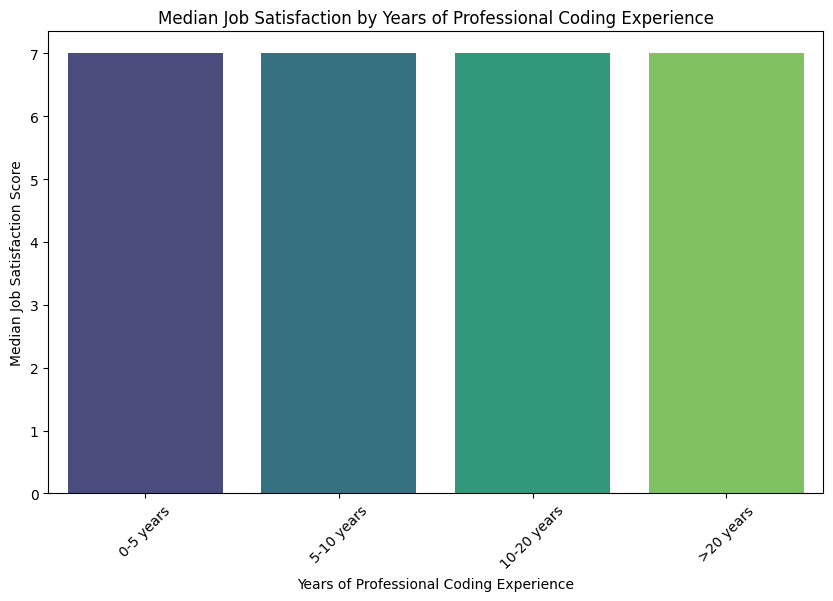

In [16]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=median_jobsat_by_experience, x='ExperienceRange', y='JobSat', palette='viridis')
plt.title("Median Job Satisfaction by Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction Score")
plt.xticks(rotation=45)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/97904769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis', order=df['JobSat'].value_counts().index)


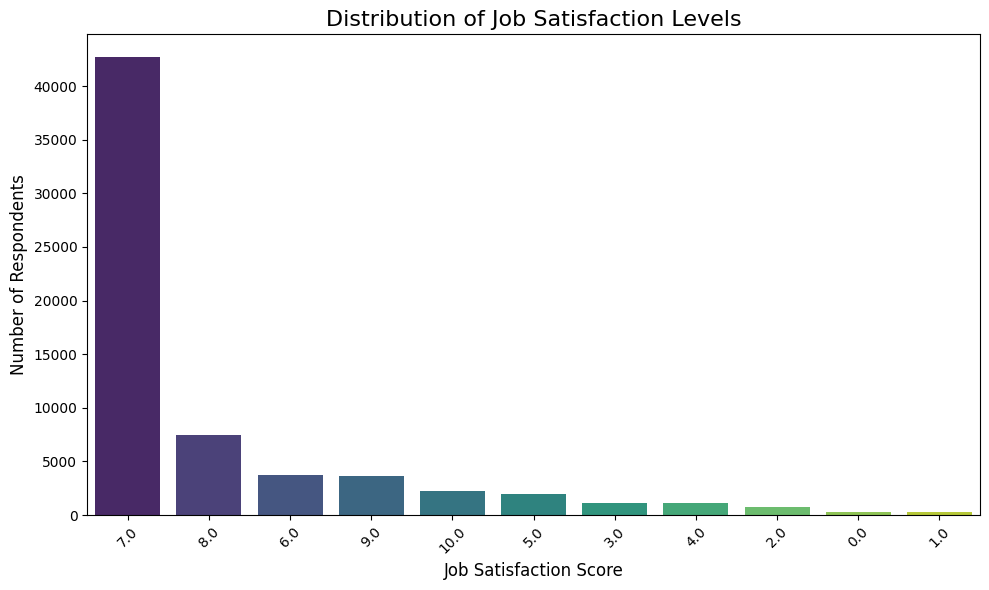

In [17]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for JobSat
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', palette='viridis', order=df['JobSat'].value_counts().index)

# Add titles and labels
plt.title("Distribution of Job Satisfaction Levels", fontsize=16)
plt.xlabel("Job Satisfaction Score", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/2843622391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='viridis', order=df['RemoteWork'].value_counts().index)


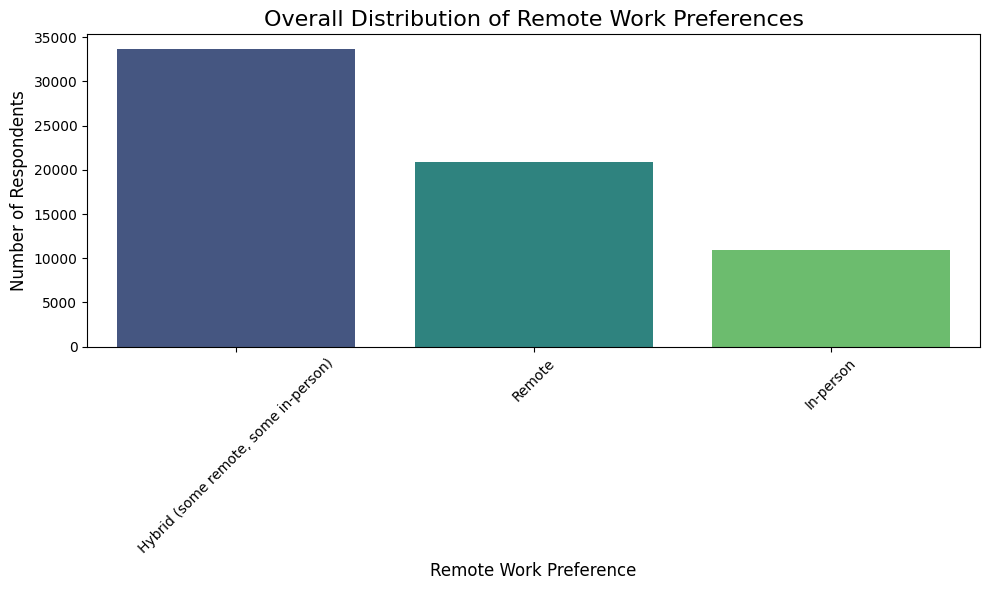

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for RemoteWork distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', palette='viridis', order=df['RemoteWork'].value_counts().index)

# Add titles and labels
plt.title("Overall Distribution of Remote Work Preferences", fontsize=16)
plt.xlabel("Remote Work Preference", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
cross_tab_employment = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True, margins_name="Total")
print(cross_tab_employment)

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                                   494   
Student, part-time;Employed, part-time                                          

/tmp/ipykernel_300/1887905465.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


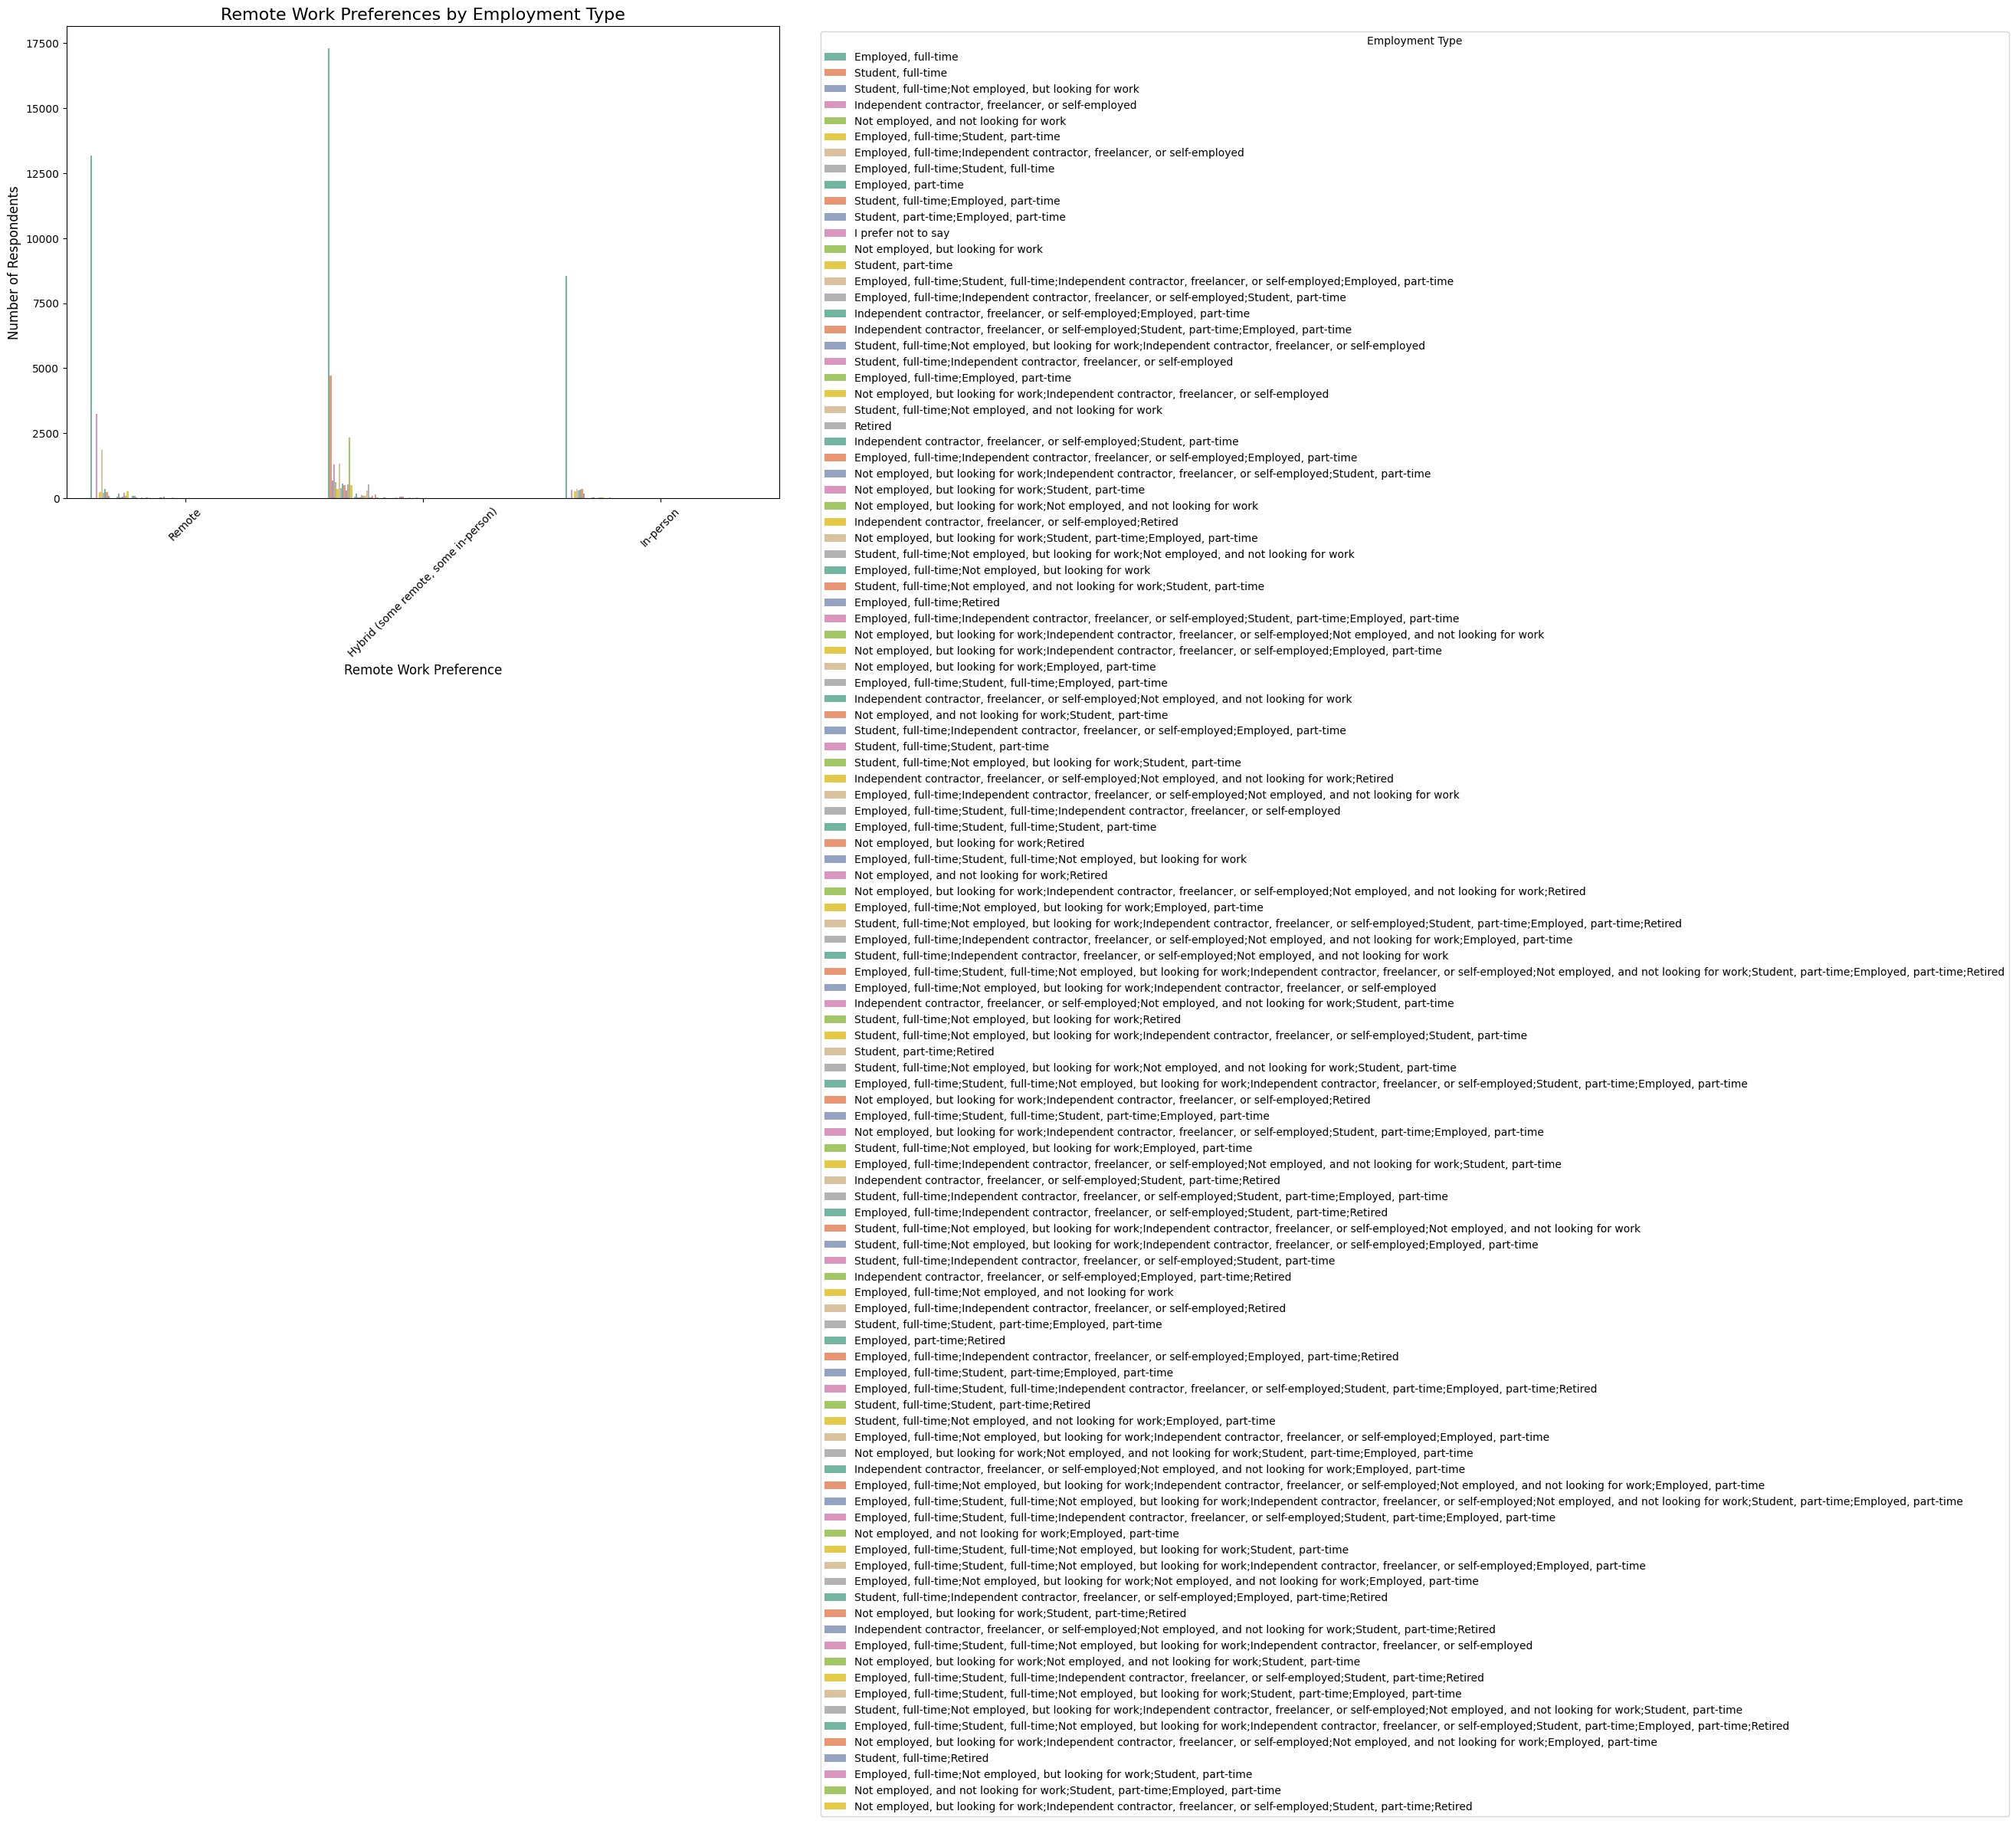

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='RemoteWork', hue='Employment', palette='Set2')

# Add titles and labels
plt.title("Remote Work Preferences by Employment Type", fontsize=16)
plt.xlabel("Remote Work Preference", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
cross_tab_job_role = pd.crosstab(df['DevType'], df['RemoteWork'], margins=True, margins_name="Total")
print(cross_tab_job_role)

RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Academic researcher                                                             813   
Blockchain                                                                       67   
Cloud infrastructure engineer                                                   300   
Data engineer                                                                   564   
Data or business analyst                                                        277   
Data scientist or machine learning specialist                                   586   
Database administrator                                                           78   
Designer                                                                        101   
DevOps specialist                                                               549   
Developer Advocate                         

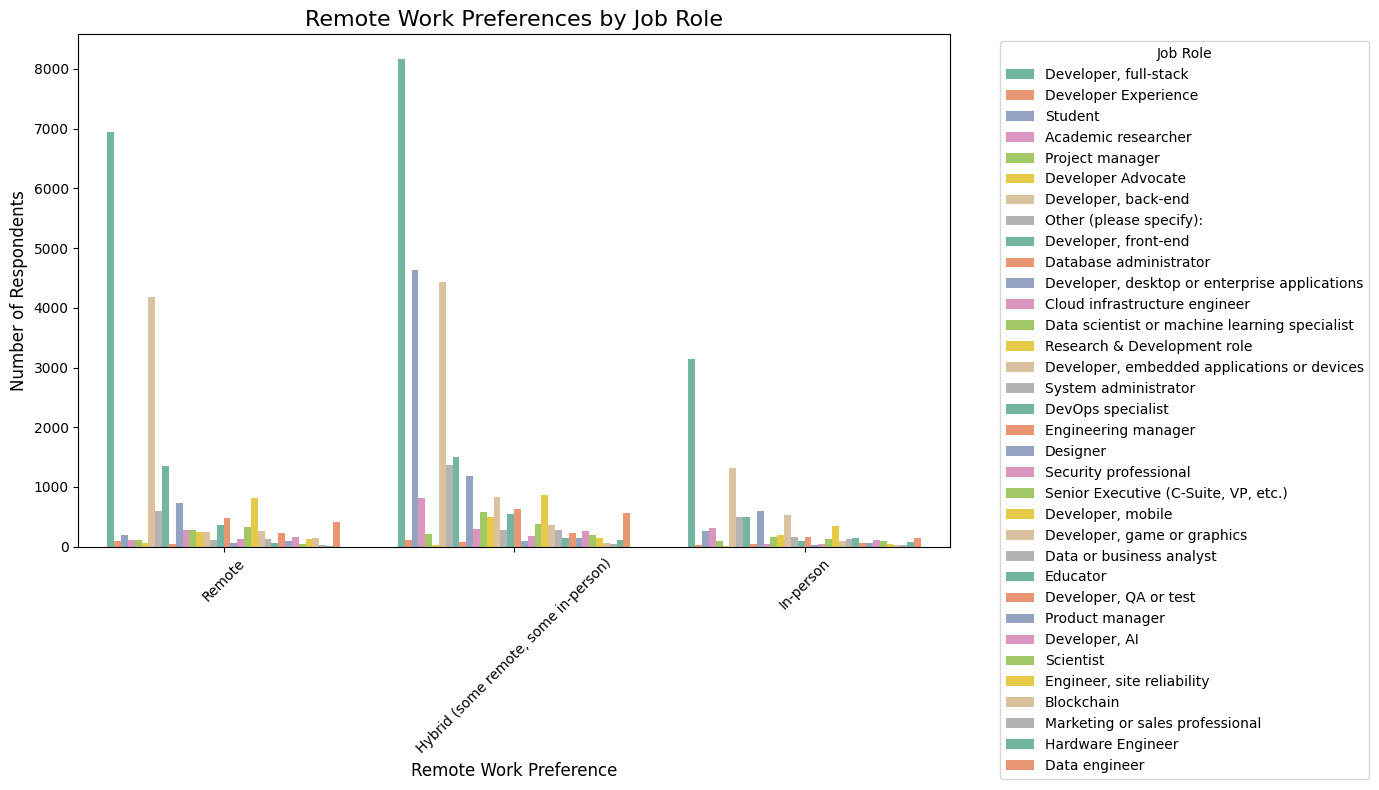

In [22]:
## Write your code here
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='RemoteWork', hue='DevType', palette='Set2')

# Add titles and labels
plt.title("Remote Work Preferences by Job Role", fontsize=16)
plt.xlabel("Remote Work Preference", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Job Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [24]:
languages = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack()

# Rename the stacked series for clarity
languages.name = 'Language'

# Join the languages back to the original DataFrame
languages_df = df.drop('LanguageHaveWorkedWith', axis=1).join(languages.reset_index(level=1, drop=True))

In [25]:
# Count the occurrences of each language by country
language_counts_by_country = (
    languages_df.groupby(['Country', 'Language'])
    .size()
    .reset_index(name='Count')
)

# Display the top languages for a specific country (optional)
print(language_counts_by_country[language_counts_by_country['Country'] == 'United States'].head())

Empty DataFrame
Columns: [Country, Language, Count]
Index: []


In [29]:
# Define a list of countries in a specific region (e.g., Europe)
european_countries = ['Germany', 'France', 'Italy', 'Spain', 'Sweden', 'Netherlands']

# Filter the data for the specified region
region_data = languages_df[languages_df['Country'].isin(european_countries)]

# Count the occurrences of each language in the region
language_counts_by_region = (
    region_data.groupby('Language')
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

# Display the top programming languages in the region
print(language_counts_by_region.head())

      Language  Count
22  JavaScript   6980
36      Python   6230
19    HTML/CSS   6126
40         SQL   5974
44  TypeScript   4664


/tmp/ipykernel_300/757908811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_languages, x='Count', y='Language', palette='viridis')


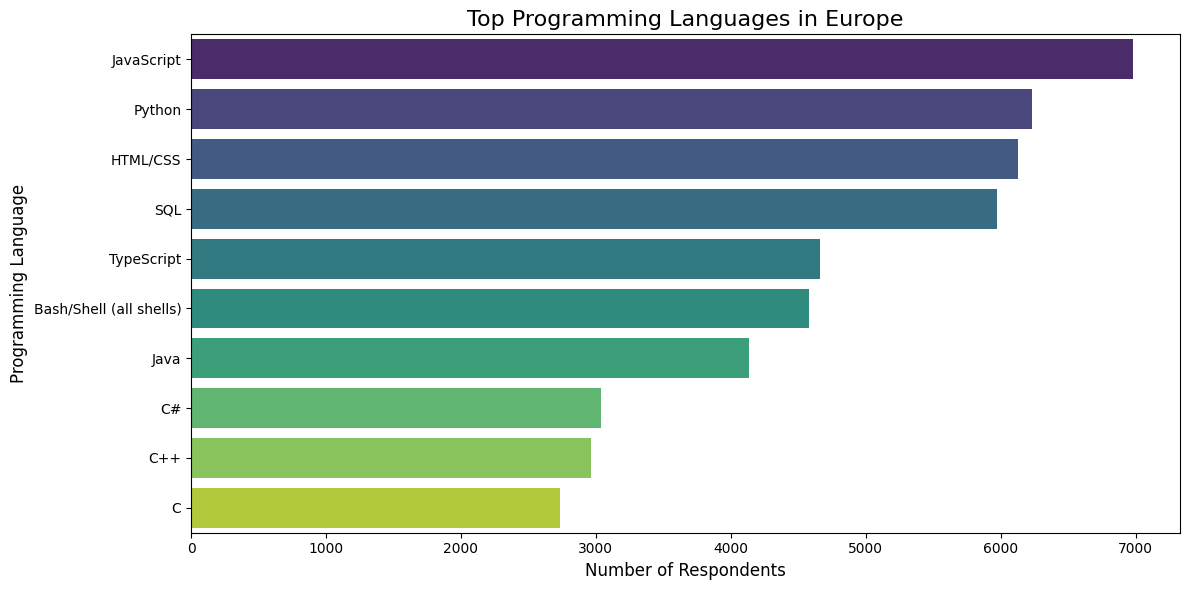

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top N languages for visualization
top_languages = language_counts_by_region.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_languages, x='Count', y='Language', palette='viridis')

# Add titles and labels
plt.title("Top Programming Languages in Europe", fontsize=16)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

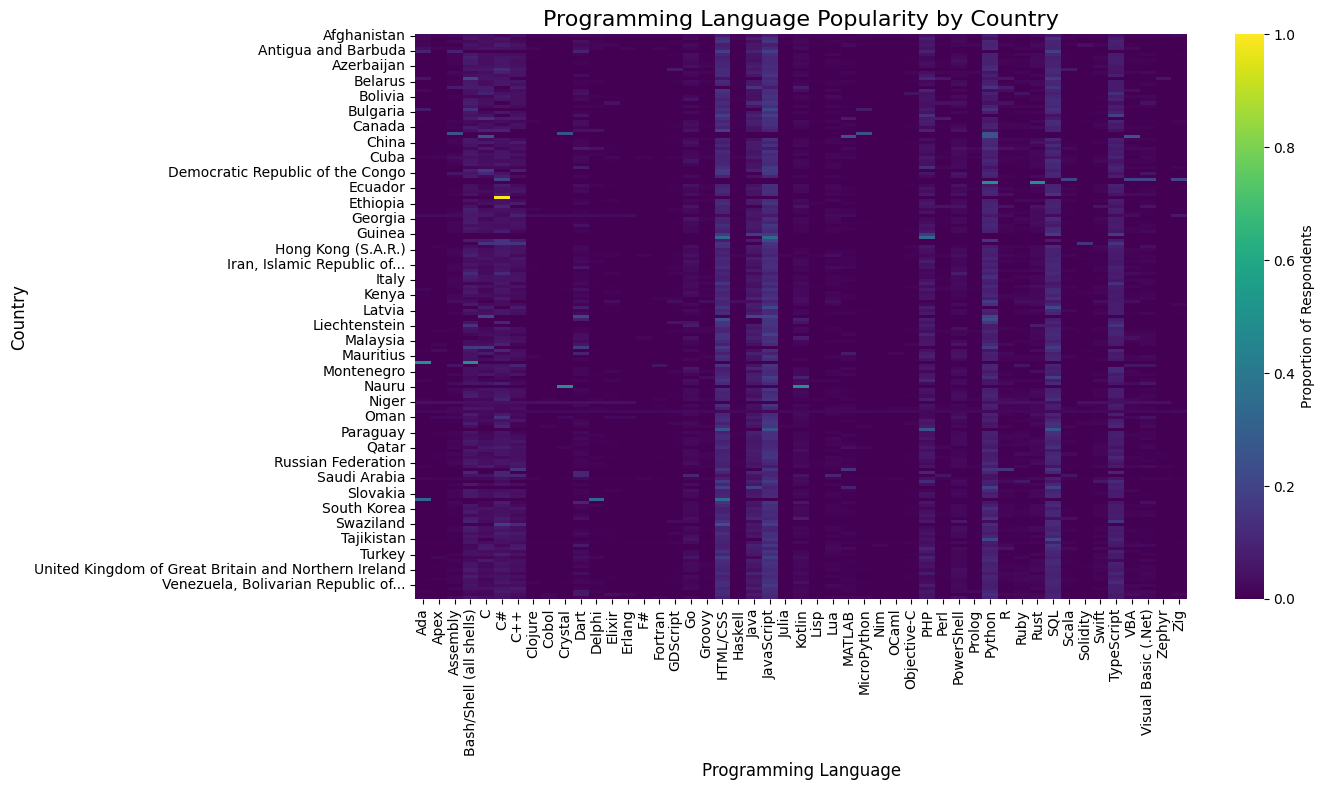

In [31]:
## Write your code here
# Pivot the data to create a matrix of language counts by region
heatmap_data = (
    language_counts_by_country.pivot(index='Country', columns='Language', values='Count')
    .fillna(0)  # Fill missing values with 0
)

# Normalize the counts to show proportions (optional)
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_normalized, cmap='viridis', cbar_kws={'label': 'Proportion of Respondents'})

# Add titles and labels
plt.title("Programming Language Popularity by Country", fontsize=16)
plt.xlabel("Programming Language", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [32]:
missing_values = df[['YearsCodePro', 'JobSatPoints_1']].isnull().sum()
print("Missing values before dropping:\n", missing_values)


Missing values before dropping:
 YearsCodePro          0
JobSatPoints_1    36113
dtype: int64


In [35]:
df['JobSatPoints_1'].value_counts(dropna=False)


JobSatPoints_1
NaN     36113
0.0     11271
10.0     4010
20.0     2909
5.0      1496
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 92, dtype: int64

In [34]:
mode_value = df['JobSatPoints_1'].mod()[0]  
print(mode_value)

0.0


In [36]:
df['JobSatPoints_1'].fillna(mode_value, inplace=True)


/tmp/ipykernel_300/2449280311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSatPoints_1'].fillna(mode_value, inplace=True)


In [37]:
df['JobSatPoints_1'].value_counts(dropna=False)

JobSatPoints_1
0.0     47384
10.0     4010
20.0     2909
5.0      1496
30.0     1309
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 91, dtype: int64

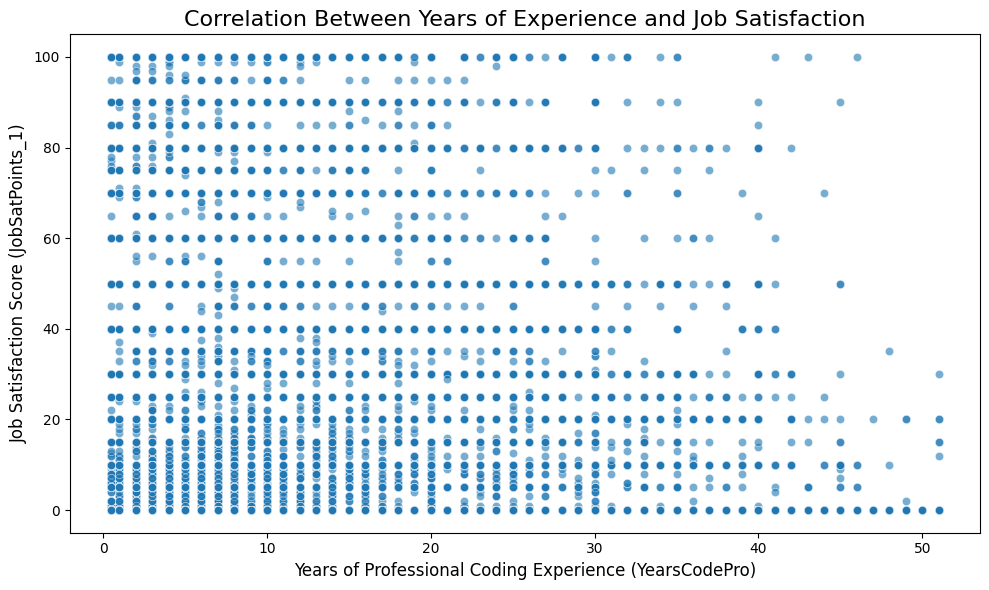

In [39]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of YearsCodePro vs JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)

# Add titles and labels
plt.title("Correlation Between Years of Experience and Job Satisfaction", fontsize=16)
plt.xlabel("Years of Professional Coding Experience (YearsCodePro)", fontsize=12)
plt.ylabel("Job Satisfaction Score (JobSatPoints_1)", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [40]:
cross_tab = pd.crosstab(df['EdLevel'], df['Employment'], margins=True, margins_name="Total")
print(cross_tab)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   
Total                                                             36525   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                        

/tmp/ipykernel_300/2134271518.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


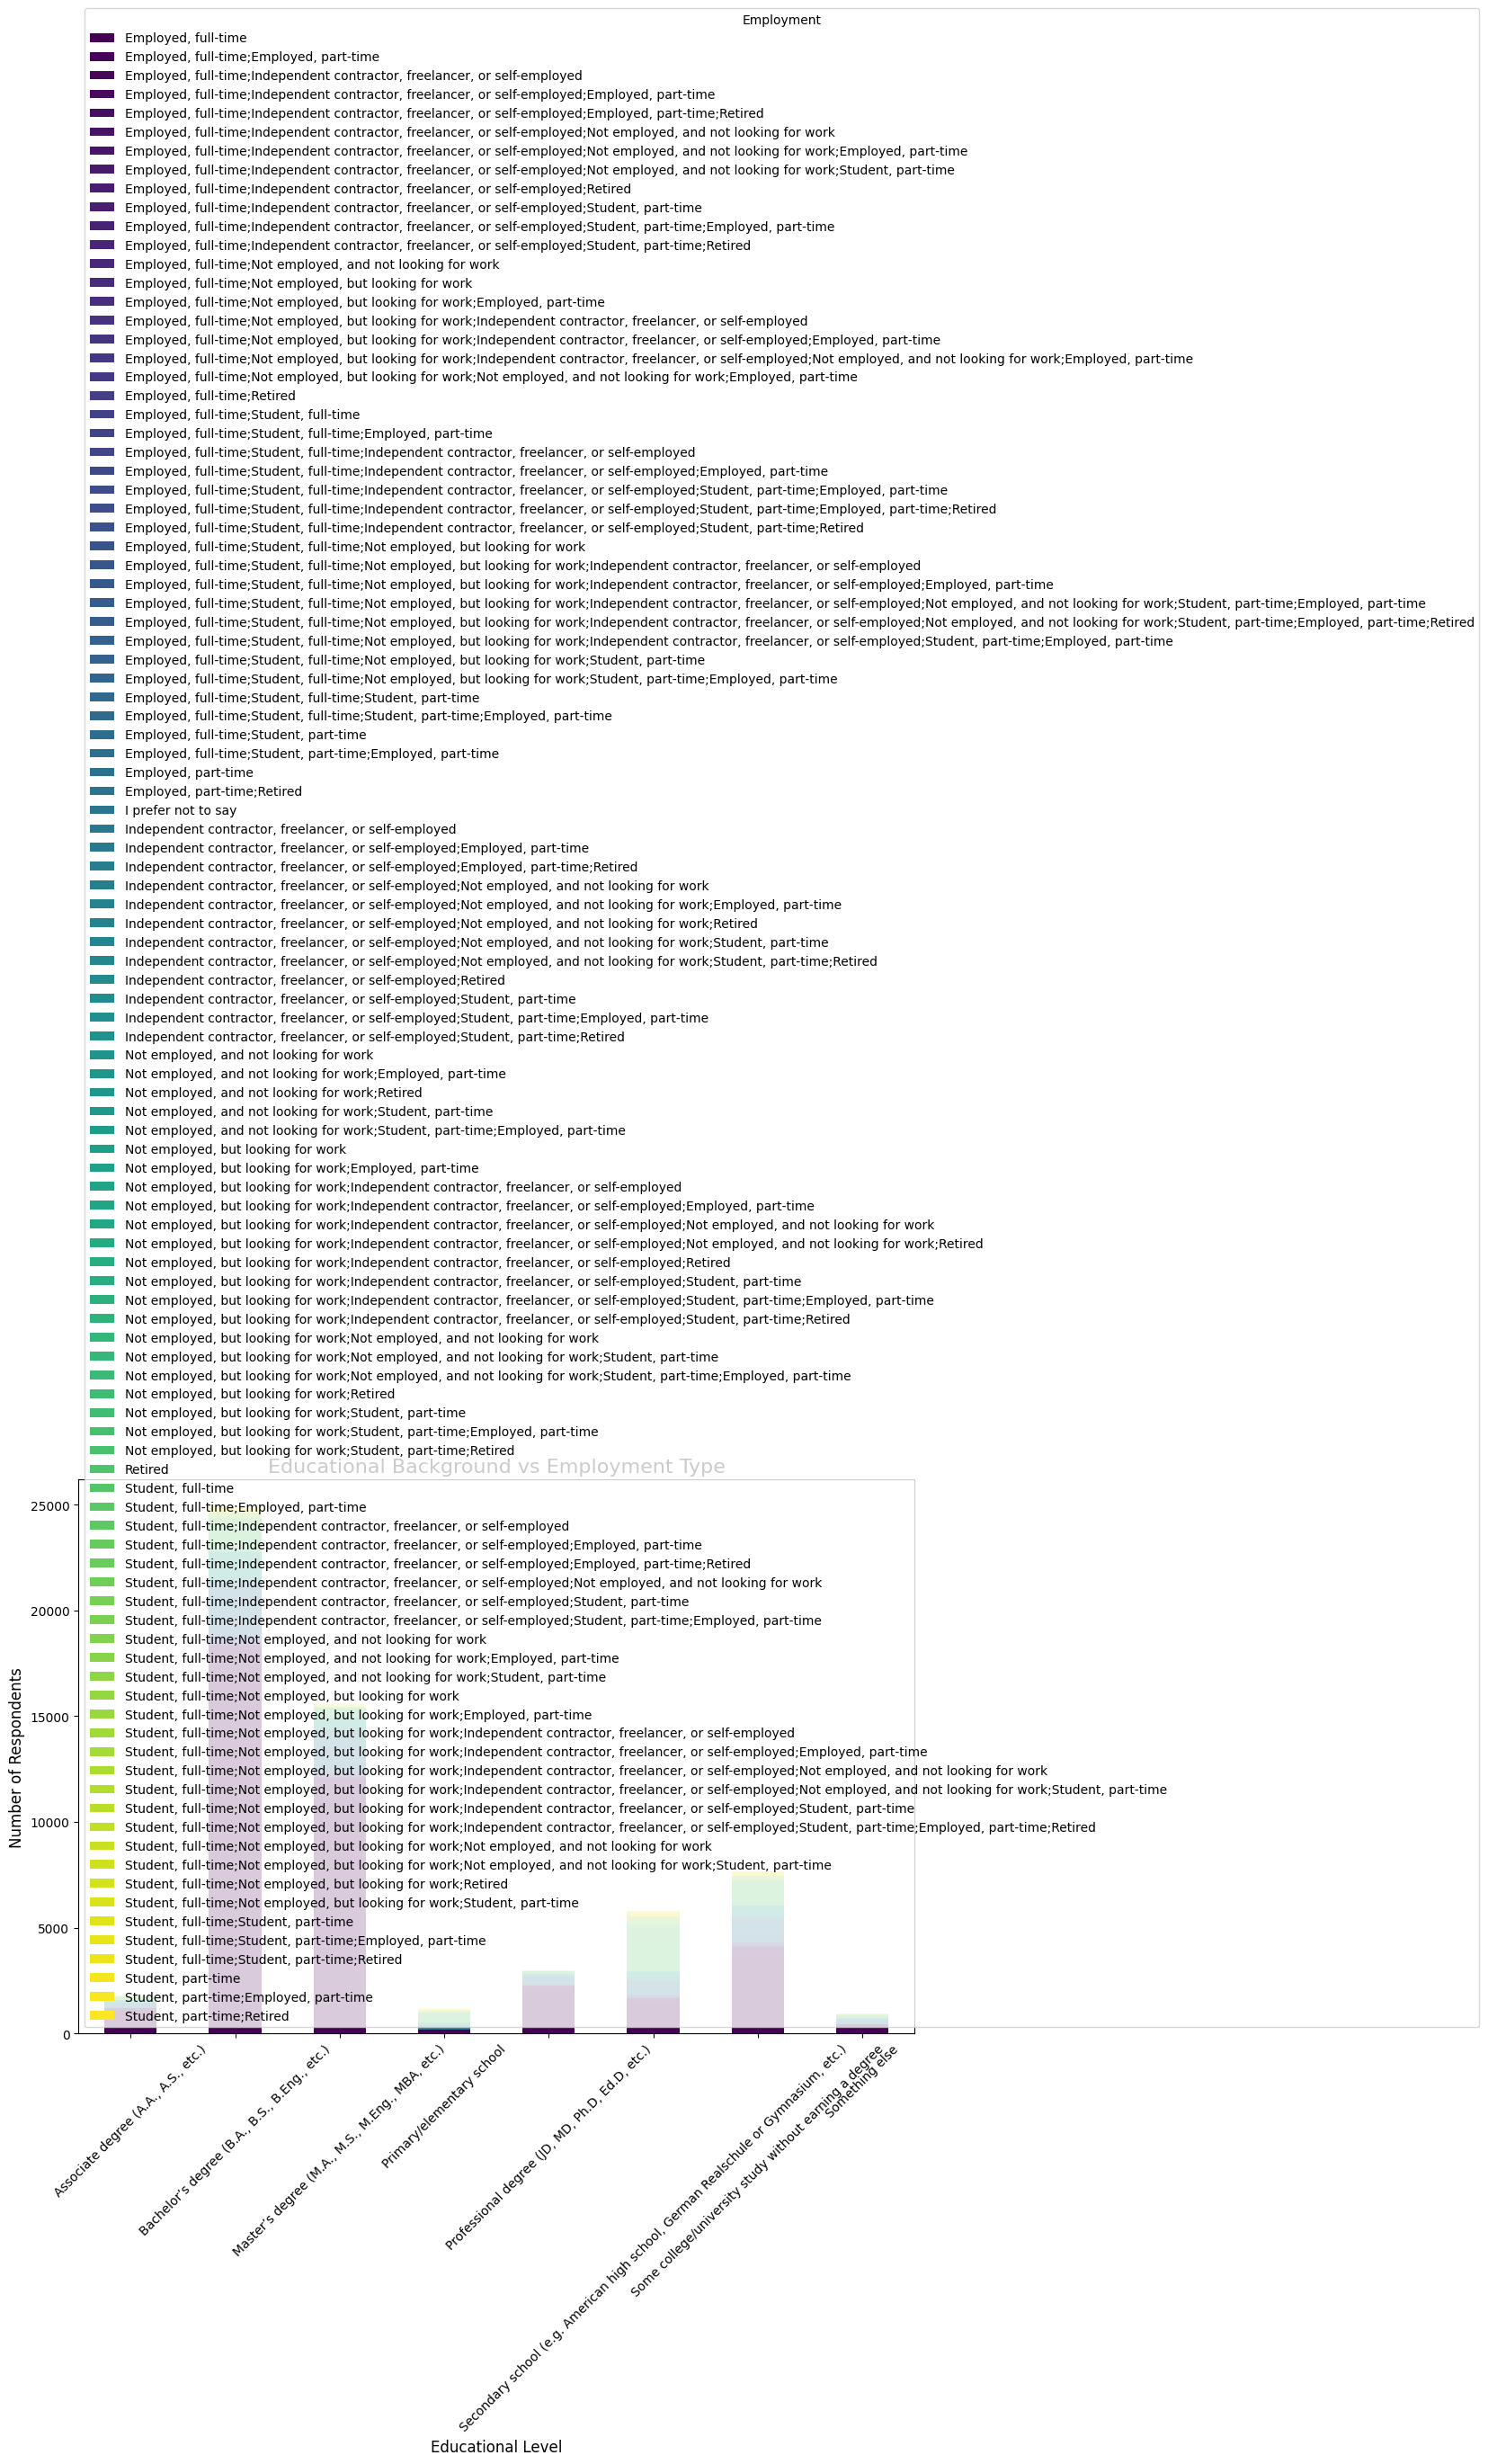

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a stacked bar chart
cross_tab_plot = pd.crosstab(df['EdLevel'], df['Employment'])

# Plot
cross_tab_plot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add titles and labels
plt.title("Educational Background vs Employment Type", fontsize=16)
plt.xlabel("Educational Level", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
normalized_cross_tab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

# Display the normalized table
print(normalized_cross_tab)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                            0.590630   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   0.673803   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                0.707784   
Primary/elementary school                                      0.139616   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                 0.697980   
Secondary school (e.g. American high school, Ge...             0.252028   
Some college/university study without earning a...             0.467782   
Something else                                                 0.404506   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_300/1436603671.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


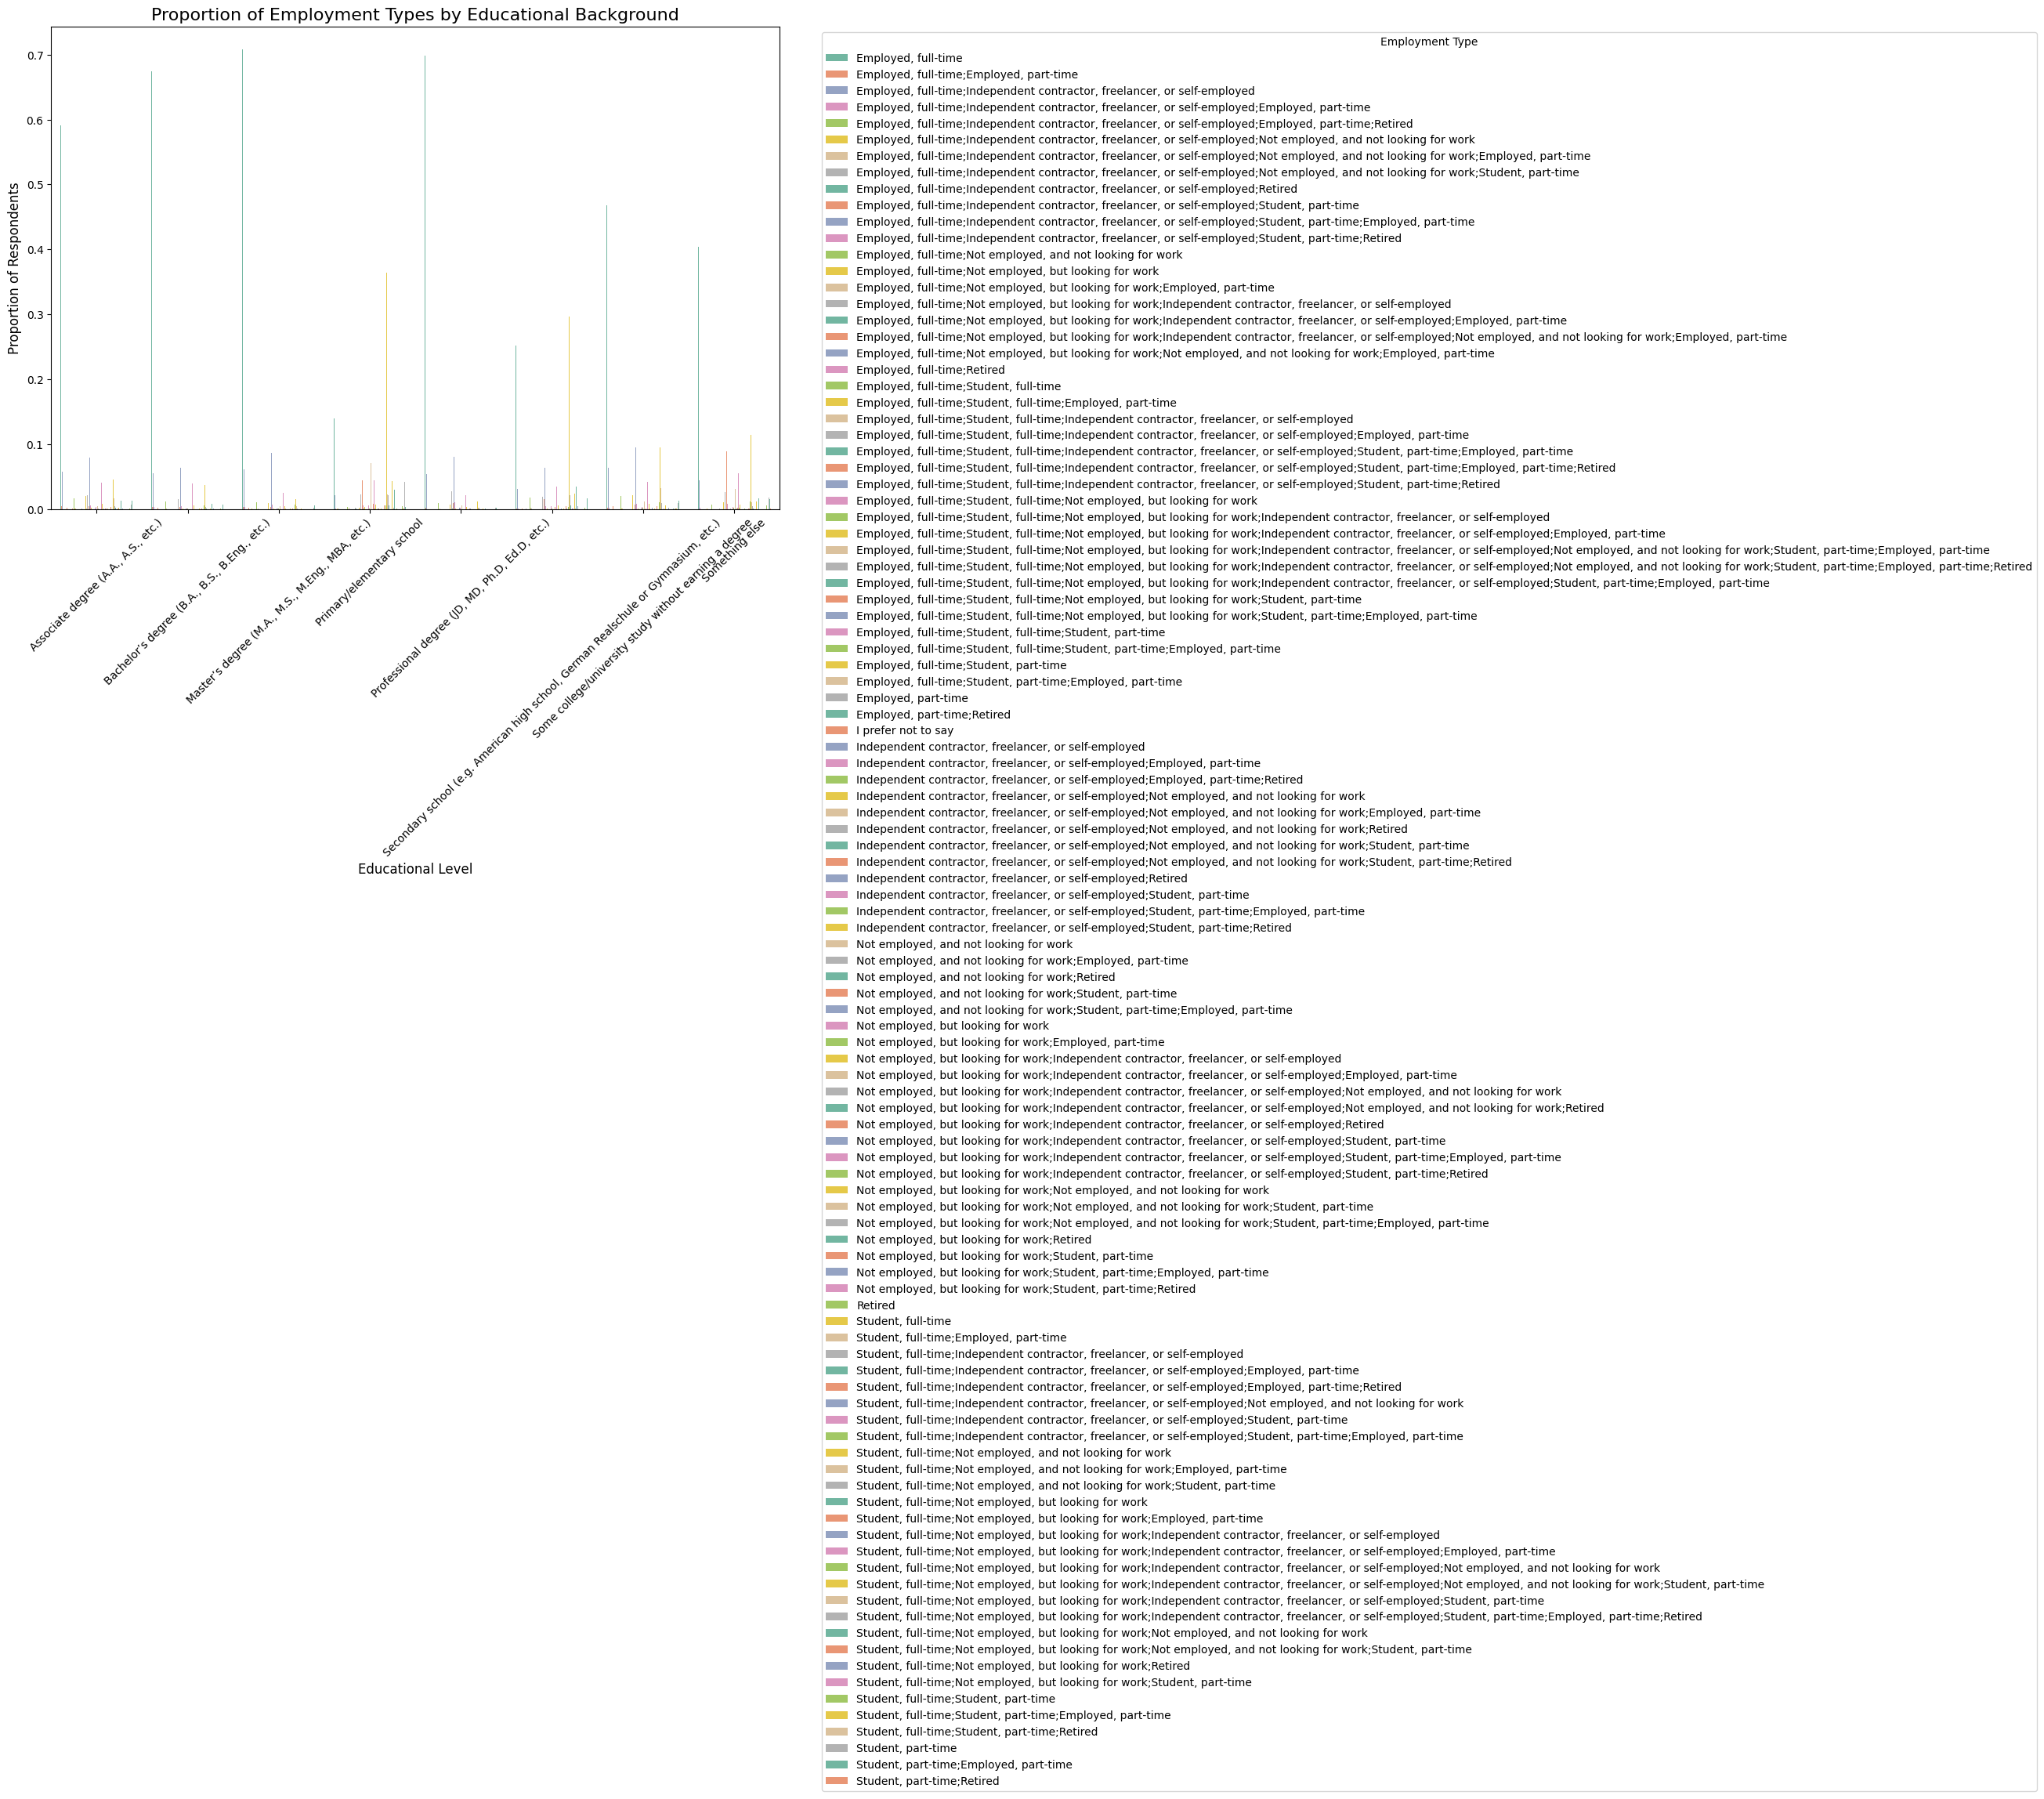

In [44]:
normalized_melted = normalized_cross_tab.reset_index().melt(id_vars='EdLevel', var_name='Employment', value_name='Proportion')

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=normalized_melted, x='EdLevel', y='Proportion', hue='Employment', palette='Set2')

# Add titles and labels
plt.title("Proportion of Employment Types by Educational Background", fontsize=16)
plt.xlabel("Educational Level", fontsize=12)
plt.ylabel("Proportion of Respondents", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('cleaned_dataset_ana.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
